In [0]:
# 做人臉辨識, 拿別人的CNN來處理, 主要看眉毛, 眼睛, 鼻子, 嘴巴
# 用的函市庫是 face_recognition : https://github.com/ageitgey/face_recognition
# 每個人畫成那個人的語意向量

In [1]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 42kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=9a9b839c50b09a376ef37b19db9ba8abb48aaf50f70d7dbe6af58264673d52d1
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


結衣長這樣 [-0.01618621  0.12676553  0.04101232 -0.08212983 -0.10170145  0.06399664
 -0.08012762 -0.06920892  0.19565971 -0.16311909  0.24629012 -0.03446776
 -0.23793235 -0.00717438 -0.01288941  0.18573497 -0.19027297 -0.19959807
 -0.00850713  0.08744164  0.0687931   0.06583904 -0.02882147  0.00756063
 -0.14892201 -0.37328854 -0.13069993 -0.01483569 -0.03284113 -0.05287179
 -0.0194958   0.01886423 -0.18371375  0.03054173  0.09599806  0.13174261
 -0.04212454 -0.10267354  0.13553183  0.03385162 -0.32884604  0.05492631
  0.09521766  0.22434303  0.10832211  0.0291515  -0.02448032 -0.16104546
  0.08472551 -0.17127916  0.07728665  0.1922424   0.08560659  0.09292375
  0.03953448 -0.14626512  0.00909582  0.14718592 -0.11433883 -0.01110623
  0.09750497 -0.02510364  0.05007991 -0.12971154  0.16745317  0.0753113
 -0.11142021 -0.23919821  0.11579249 -0.13103646 -0.10406463  0.13709953
 -0.18124261 -0.24179769 -0.23609209  0.02684948  0.3577823   0.15238692
 -0.13877057  0.03095989  0.03728909 -0.011659

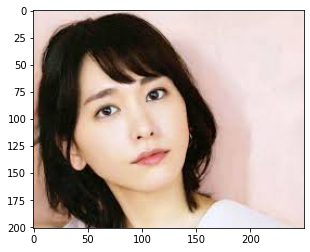

In [6]:
import face_recognition
import matplotlib.pyplot as plt
%matplotlib inline
img = face_recognition.load_image_file("結衣.jpg")
en = face_recognition.face_encodings(img)
print("結衣長這樣", en[0])
plt.imshow(img)

In [13]:
import glob
subs = ["jpg", "png", "jpeg"]

names, encodings = [], []
for fn in glob.glob("*"):
    sub = fn.split(".")[-1]
    if sub.lower() in subs:
        n = fn.split(".")[0]
        names.append(n)
        img = face_recognition.load_image_file(fn)
        en = face_recognition.face_encodings(img)[0]
        encodings.append(en)
print(names)
print(encodings)

['韓國瑜', '結衣', '阿信', '蔡英文']
[array([-0.04539393,  0.0722048 , -0.00379621, -0.0110267 , -0.04474986,
        0.00092457, -0.04510014, -0.14032504,  0.100951  , -0.02278872,
        0.24009556, -0.05297795, -0.14477715, -0.15912426, -0.04978693,
        0.1977406 , -0.22071965, -0.17958802, -0.06596061,  0.00297851,
        0.0472068 , -0.02916364,  0.0170764 ,  0.0254069 , -0.02917358,
       -0.32346469, -0.07676037, -0.08478197,  0.05783622, -0.05297959,
       -0.07900193,  0.00181692, -0.23453721, -0.10322907,  0.0903919 ,
        0.10319292, -0.03497531, -0.1146588 ,  0.17106177,  0.03116464,
       -0.18205139,  0.10687606,  0.06308326,  0.21635213,  0.2157388 ,
        0.03268555,  0.06573355, -0.16139549,  0.11578026, -0.10422865,
       -0.04498671,  0.19199711,  0.09454341,  0.0608051 , -0.02939136,
       -0.12064528,  0.00172012,  0.1036472 , -0.07982585,  0.00975232,
        0.09391587, -0.07738395, -0.00539193, -0.09999225,  0.18797308,
        0.02386367, -0.08596712, -0.

請輸入網址:https://img3.secretchina.com/pic/2020/1-29/p2615151a685480107-ss.jpg


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


跟 韓國瑜 的距離: 0.6467830121914123
跟 結衣 的距離: 0.5043089212081501
跟 阿信 的距離: 0.6366591371595827
跟 蔡英文 的距離: 0.525968194528458
應該是: 結衣
--------------------------------------------------


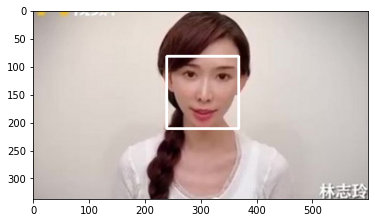

In [15]:
import requests
import cv2

url = input("請輸入網址:")
response = requests.get(url, stream=True, verify=False)
img = face_recognition.load_image_file(response.raw)

ens = face_recognition.face_encodings(img)
locs = face_recognition.face_locations(img)

for top, right, bottom, left in locs:
    # 圖片, 左上座標, 右下座標, 顏色, 粗細
    cv2.rectangle(img, (left, top), (right, bottom), (255, 255, 255), 4)

for en in ens:
    distances = face_recognition.face_distance(en, encodings)
    for n, d in zip(names, distances):
        print("跟", n, "的距離:", d)
    idx = distances.argmin(axis=-1)
    print("應該是:", names[idx])
    print("-" * 50)

plt.imshow(img)